In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pickle

In [2]:
df = pd.read_csv('SMSSpamCollection', sep = "\t", names = ['labels', 'SMS'])
df.head()

,labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.isnull().sum()

labels    0
SMS       0
dtype: int64

In [6]:
df.groupby('labels').count()

,SMS
labels,
ham,4825
spam,747


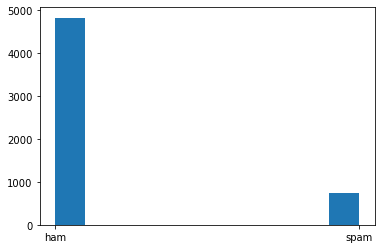

In [7]:
plt.hist(df.labels);

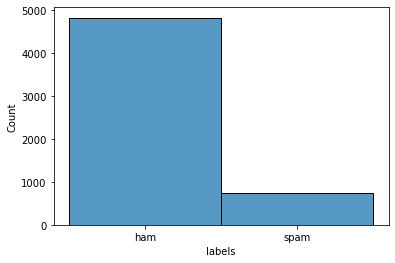

In [8]:
sns.histplot(df.labels);

In [9]:
df.labels.value_counts()/df.labels.count()

ham     0.865937
spam    0.134063
Name: labels, dtype: float64

In [10]:
le = LabelEncoder()

In [11]:
data = df.to_numpy()

In [12]:
data[0]

array(['ham',
       'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
      dtype=object)

In [13]:
data[2]

array(['spam',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
      dtype=object)

In [14]:
X = data[:, 1]
y = data[:, 0]

In [15]:
X.shape, y.shape

((5572,), (5572,))

In [16]:
tokenizer =  RegexpTokenizer('\w+') #all the words
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [17]:
def getStem(review):
    review = review.lower()
    tokens = tokenizer.tokenize(review) #breaking into small tokens
    removed_stopwords = [w for w in tokens if w not in sw]
    stemmed_words = [ps.stem(token) for token in removed_stopwords ]
    clean_review = ' '.join(stemmed_words)
    return clean_review

In [18]:
def getDoc(document):
    d = []
    
    for doc in document:
        d.append(getStem(doc))
    
    return d
        

In [19]:
stemmed_doc = getDoc(X)

In [20]:
stemmed_doc[:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030']

In [21]:
cv = CountVectorizer()

In [22]:
#create vocab

In [23]:
vc = cv.fit_transform(stemmed_doc)

In [24]:
X = vc.toarray()

In [26]:
pickle.dump(cv, open('transform.pkl', 'wb'))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
model = MultinomialNB()


In [30]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9820554649265906

In [38]:
msg = ["how are you"]

In [39]:
def prepare(msgs):
    d = getDoc(msgs)
    # dont do fit_transform!! it will create new vocab.
    return cv.transform(d)
    

In [40]:
msgs = prepare(msg)

In [41]:
y_pr = model.predict(msgs)

In [42]:
y_pr[0]

'ham'

In [36]:
filename = 'nlp_model.pkl'
pickle.dump(model, open(filename, 'wb'))